<font size = "12">  Meet Badgujar's project about Stock Market Prediction</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)

In [60]:
sm = pd.read_csv("stock market.csv")

In [61]:
sm

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [62]:
sm.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [63]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [64]:
sm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [65]:
sm.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [66]:
sm.duplicated().sum()

0

In [67]:
sm['Date'] = pd.to_datetime(sm['Date'])

In [68]:
print(f'Dataframe contains stock prices between {sm.Date.min()} {sm.Date.max()}')
print(f'Total days = {(sm.Date.max() - sm.Date.min()).days} Days')

Dataframe contains stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00
Total days = 1460 Days


<AxesSubplot:>

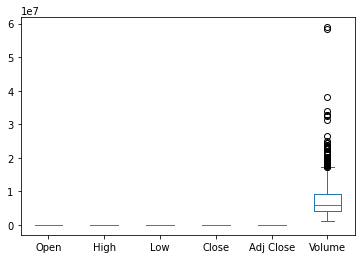

In [69]:
sm[['Date','Open','High','Low','Close','Adj Close','Volume']].plot(kind = 'box')

In [70]:
layout = go.Layout(
    title = 'Stock Prices',
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New , monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price',
        titlefont =dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )   
)

sm_data  = [{'x':sm['Date'] , 'y':sm['Close']}]
plot = go.Figure(data = sm_data, layout =layout)

In [71]:
iplot(plot)

In [72]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [73]:
X = np.array(sm.index).reshape(-1,1)
Y = sm['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 101)

In [74]:
scaler = StandardScaler().fit(X_train)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
# lm stands for linear regression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [82]:
#actual and predicted values on graph

trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
sm_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = sm_data, layout = layout)

In [83]:
iplot(plot2)